In [1]:
import pandas as pd
import json

In [2]:
#Loading User Dataset 

df_users=pd.read_csv('/Users/alkancan/Downloads/final_users.csv',dtype={"_id":str})

/var/folders/1z/dpf61nyn057547f_7c8_h6th0000gn/T/ipykernel_93947/2832486022.py:3: DtypeWarning: Columns (8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_users=pd.read_csv('/Users/alkancan/Downloads/final_users.csv',dtype={"_id":str})


In [3]:
df_users

,Unnamed: 0,_id,age_group,conservatism,environmentalism,feminism,gender,ideology_1,ideology_10,ideology_10_count,...,location,m3_pred,name,screen_name,secularism,social_democracy,socialism,turkish_nationalism,tweet_count,user_ideology
0,0,1098202425289248768,30-39,0,0,0,male,social_democracy,NaN,NaN,...,35.0,full,musa,musa44539424,0,5,0,1,328,social_democracy
1,1,2912684104,19-29,0,0,0,female,islamism,NaN,NaN,...,34.0,full,Fatmanur Uğur,fatmanurbetul_,0,0,0,2,191,islamism
2,2,2243524512,30-39,0,0,0,male,turkish_nationalism,NaN,NaN,...,16.0,full,Furkan Özgültekin,furkanoz16,0,0,0,7,98,turkish_nationalism
3,3,1333086390746296320,<=18,0,0,0,female,turkish_nationalism,NaN,NaN,...,33.0,full,Aybüke 🌙,aybkkru,0,1,0,10,379,turkish_nationalism
4,4,932359632693194753,<=18,3,0,0,male,turkish_nationalism,NaN,NaN,...,34.0,full,Yıldıray,BenYldrAy1,0,1,0,7,308,turkish_nationalism
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460135,460135,1377180414377222144,>=40,1,0,0,male,turkish_nationalism,NaN,NaN,...,34.0,full,mehditokoğlu,mehditokolu1,0,1,0,5,453,no_majority
460136,460136,1552560787234983937,30-39,0,0,0,male,kemalism,NaN,NaN,...,34.0,full,Cihan Caglar,CihanCaglar17,2,0,0,4,178,kemalism
460137,460137,1664990548095037442,>=40,2,0,0,male,turkish_nationalism,NaN,NaN,...,34.0,full,erf,erfpayn,0,0,0,9,2057,turkish_nationalism
460138,460138,1663444181069574147,>=40,0,0,0,male,social_democracy,NaN,NaN,...,59.0,full,Arda Tuna Kirazlar,ArdaTunKirazlar,2,19,1,2,151,social_democracy


In [4]:
#age group distribution before sampling
df_users['age_group'].value_counts(normalize=True)

age_group
>=40     0.545947
<=18     0.180489
30-39    0.166793
19-29    0.106772
Name: proportion, dtype: float64

In [5]:
#gender distribution before sampling
df_users['gender'].value_counts(normalize=True)

gender
male      0.827074
female    0.172926
Name: proportion, dtype: float64

In [6]:
### Loading Tweet Dataset

file_path = '/Users/alkancan/Downloads/alkan_immigration_with_sentiment.json'

try:
    with open(file_path, 'r') as file:
        df_immigration = json.load(file)
except ValueError as e:
    print(f"Error loading JSON: {e}")

In [7]:
df_migration=pd.DataFrame(df_immigration)

In [8]:
df_migration.columns

Index(['user_id', 'screen_name', 'name', 'location', 'pcode', 'gender',
       'age_group', 'isOrg', 'm3_pred', 'author_id', 'text', 'emotions',
       'ideology_1', 'democracy', 'big5', 'welfare', 'ideology_2', 'municipal',
       'women_issues1', 'immigration_topic_2', 'stance_immigration',
       'tweet_id', 'tweet_date', 'Sentiment'],
      dtype='object')

In [9]:
df_migration = df_migration.rename(columns={
    'ideology_1': 'tweet_ideology_1',
    'ideology_2': 'tweet_ideology_2'
})

In [10]:
df_migration.columns

Index(['user_id', 'screen_name', 'name', 'location', 'pcode', 'gender',
       'age_group', 'isOrg', 'm3_pred', 'author_id', 'text', 'emotions',
       'tweet_ideology_1', 'democracy', 'big5', 'welfare', 'tweet_ideology_2',
       'municipal', 'women_issues1', 'immigration_topic_2',
       'stance_immigration', 'tweet_id', 'tweet_date', 'Sentiment'],
      dtype='object')

In [11]:
df_users.columns

Index(['Unnamed: 0', '_id', 'age_group', 'conservatism', 'environmentalism',
       'feminism', 'gender', 'ideology_1', 'ideology_10', 'ideology_10_count',
       'ideology_11', 'ideology_11_count', 'ideology_1_count', 'ideology_2',
       'ideology_2_count', 'ideology_3', 'ideology_3_count', 'ideology_4',
       'ideology_4_count', 'ideology_5', 'ideology_5_count', 'ideology_6',
       'ideology_6_count', 'ideology_7', 'ideology_7_count', 'ideology_8',
       'ideology_8_count', 'ideology_9', 'ideology_9_count', 'isOrg',
       'islamism', 'kemalism', 'kurdish_national_movement', 'liberalism',
       'location', 'm3_pred', 'name', 'screen_name', 'secularism',
       'social_democracy', 'socialism', 'turkish_nationalism', 'tweet_count',
       'user_ideology'],
      dtype='object')

In [12]:



# The columns of interest from df_users
df_users_subset = df_users[['_id', 'ideology_1', 'ideology_2', 'ideology_3']]

# Rename the _id column
df_users_subset = df_users_subset.rename(columns={'_id': 'user_id'})

# Merge the two DataFrames on the 'user_id' column
df_migration_updated = pd.merge(df_migration, df_users_subset, on='user_id', how='left')


print(df_migration_updated.columns)


Index(['user_id', 'screen_name', 'name', 'location', 'pcode', 'gender',
       'age_group', 'isOrg', 'm3_pred', 'author_id', 'text', 'emotions',
       'tweet_ideology_1', 'democracy', 'big5', 'welfare', 'tweet_ideology_2',
       'municipal', 'women_issues1', 'immigration_topic_2',
       'stance_immigration', 'tweet_id', 'tweet_date', 'Sentiment',
       'ideology_1', 'ideology_2', 'ideology_3'],
      dtype='object')


In [13]:
df_migration_updated

,user_id,screen_name,name,location,pcode,gender,age_group,isOrg,m3_pred,author_id,...,municipal,women_issues1,immigration_topic_2,stance_immigration,tweet_id,tweet_date,Sentiment,ideology_1,ideology_2,ideology_3
0,1599527577667895297,Halilkamaci63,Halil Kamacı 🇹🇷,"Bahçelievler, Şanlıurfa",34,male,>=40,0.1677,full,1599527577667895297,...,[],0,1,0.0,1659893518209302528,2023-05-20 12:07:08,positive,turkish_nationalism,NaN,NaN
1,1599527577667895297,Halilkamaci63,Halil Kamacı 🇹🇷,"Bahçelievler, Şanlıurfa",34,male,>=40,0.1677,full,1599527577667895297,...,[],0,1,1.0,1660981951136776198,2023-05-23 12:12:11,neutral,turkish_nationalism,NaN,NaN
2,748843657298636800,Malcolmxll,JİBARO,,,male,<=18,0.4243,full,None,...,[],0,1,1.0,1712382059686002960,2023-10-12 08:17:00,negative,turkish_nationalism,NaN,NaN
3,748843657298636800,Malcolmxll,JİBARO,,,male,<=18,0.4243,full,None,...,[],0,1,0.0,1716688111915106304,2023-10-24 05:28:00,positive,turkish_nationalism,NaN,NaN
4,748843657298636800,Malcolmxll,JİBARO,,,male,<=18,0.4243,full,None,...,[],0,1,0.0,1724367443882045614,2023-11-14 10:03:00,positive,turkish_nationalism,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284462,856186670,ARatkaryab,afatsum,,,male,<=18,0.8165,full,None,...,[],1,1,2.0,1537412415683452929,2022-06-16 12:30:00,negative,turkish_nationalism,kemalism,NaN
1284463,856186670,ARatkaryab,afatsum,,,male,<=18,0.8165,full,None,...,[],0,1,2.0,1539214013401292801,2022-06-21 11:49:00,negative,turkish_nationalism,kemalism,NaN
1284464,856186670,ARatkaryab,afatsum,,,male,<=18,0.8165,full,856186670,...,[],0,1,0.0,1623764067440525312,2023-02-09 19:21:36,negative,turkish_nationalism,kemalism,NaN
1284465,856186670,ARatkaryab,afatsum,,,male,<=18,0.8165,full,None,...,[],0,1,2.0,1657873271113543682,2023-05-14 22:19:00,negative,turkish_nationalism,kemalism,NaN


In [14]:
df_migration_updated.to_json('immigration_tweets_with_ideologies.json')

## Descriptive Statistics

### User-Level

In [15]:
import pandas as pd

# Aggregate data by user_id
user_summary = df_migration_updated.groupby('user_id').agg({
    'gender': 'first',  # Assuming gender is consistent for each user
    'age_group': 'first',  # Assuming age_group is consistent for each user
    'emotions': lambda x: x.mode()[0] if len(x.mode()) > 0 else None,  # Most frequent emotion
    'stance_immigration': lambda x: x.mode()[0] if len(x.mode()) > 0 else None,  # Most frequent stance
    'ideology_1': lambda x: x.mode()[0] if len(x.mode()) > 0 else None,  # Most frequent ideology in position 1
    'ideology_2': lambda x: x.mode()[0] if len(x.mode()) > 0 else None,  # Most frequent ideology in position 2
    'ideology_3': lambda x: x.mode()[0] if len(x.mode()) > 0 else None,  # Most frequent ideology in position 3
    'tweet_id': 'count'  # Number of tweets per user
}).reset_index()

In [16]:
user_summary

,user_id,gender,age_group,emotions,stance_immigration,ideology_1,ideology_2,ideology_3,tweet_id
0,1000004068063023105,female,<=18,[],0.0,liberalism,None,None,5
1,100001701,male,<=18,[],2.0,kemalism,turkish_nationalism,None,3
2,1000018742,male,>=40,[],0.0,turkish_nationalism,None,None,1
3,1000025418836185088,male,<=18,[],2.0,turkish_nationalism,None,None,17
4,100003084,male,30-39,[],0.0,turkish_nationalism,social_democracy,environmentalism,18
...,...,...,...,...,...,...,...,...,...
89822,999919314336595968,male,<=18,[],0.0,turkish_nationalism,kemalism,social_democracy,7
89823,999933834,female,>=40,[],0.0,turkish_nationalism,kemalism,None,2
89824,999944193396092928,male,>=40,[],0.0,turkish_nationalism,None,None,4
89825,999982572733128704,male,>=40,[],0.0,social_democracy,None,None,6


In [17]:
#User Count by Gender
user_summary['gender'].value_counts()

gender
male      75050
female    14777
Name: count, dtype: int64

In [18]:
#User Percentage Distribution by Gender
user_summary['gender'].value_counts(normalize=True)

gender
male      0.835495
female    0.164505
Name: proportion, dtype: float64

In [19]:
user_summary['age_group'].value_counts()

age_group
>=40     48606
<=18     16644
30-39    15191
19-29     9386
Name: count, dtype: int64

In [20]:
user_summary['age_group'].value_counts(normalize=True)

age_group
>=40     0.541107
<=18     0.185290
30-39    0.169114
19-29    0.104490
Name: proportion, dtype: float64

### Tweet-Level

In [21]:
import pandas as pd


# Concatenate the three columns into one series to count all occurrences
all_ideologies = pd.concat([df_migration_updated['ideology_1'], 
                            df_migration_updated['ideology_2'], 
                            df_migration_updated['ideology_3']])

# Count the occurrences of each ideology
ideology_counts = all_ideologies.value_counts()


print(ideology_counts)

turkish_nationalism          1119921
islamism                      589346
kemalism                      586199
social_democracy              284566
liberalism                    273554
conservatism                   89770
feminism                       68882
kurdish_national_movement      37708
environmentalism               14268
secularism                     11791
socialism                       9183
Name: count, dtype: int64


In [22]:
# Tweet Count by the first ideology
df_migration_updated['ideology_1'].value_counts()

ideology_1
turkish_nationalism          782489
islamism                     201249
social_democracy             108468
kemalism                      99674
liberalism                    56061
feminism                      18747
kurdish_national_movement      9935
environmentalism               4118
socialism                      2095
conservatism                   1176
secularism                      455
Name: count, dtype: int64

In [23]:
#Tweet Count by Emotion
df_migration_updated['emotions'].value_counts()

emotions
[]                                               456191
[ofke]                                           455166
[ofke, onaylamama]                               135461
[onaylamama]                                      66749
[ofke, igrenme]                                   52494
                                                  ...  
[pismanlik, ofke, igrenme, onaylamama]                1
[uzuntu, kaygi, umutsuzluk, ofke, onaylamama]         1
[sevgi, uzuntu, ofke, igrenme, onaylamama]            1
[pismanlik, igrenme, onaylamama]                      1
[sevgi, minnet, arzu]                                 1
Name: count, Length: 333, dtype: int64

In [33]:
#User Distribution by Ideology

all_ideologies = pd.concat([user_summary['ideology_1'], 
                            user_summary['ideology_2'], 
                            user_summary['ideology_3']])

# Count the occurrences of each ideology (i.e., count the users for each ideology)
ideology_user_count = all_ideologies.value_counts()

# Display the result
print(ideology_user_count)

turkish_nationalism          65898
kemalism                     26426
islamism                     20726
social_democracy             15840
liberalism                   11112
conservatism                  5392
feminism                      2982
kurdish_national_movement     1030
environmentalism               696
socialism                      617
secularism                     267
Name: count, dtype: int64


#### Stance Distribution by Age Group & Gender

In [24]:
import pandas as pd

# Group by gender and stance_immigration, then count occurrences
gender_stance_counts = df_migration_updated.groupby(['gender', 'stance_immigration']).size().unstack(fill_value=0)

# Calculate percentages by gender
gender_stance_percentages = gender_stance_counts.div(gender_stance_counts.sum(axis=1), axis=0) * 100

# Display the tweet counts and percentages by gender
print("Tweet counts by gender:")
print(gender_stance_counts)
print("\nPercentages by gender:")
print(gender_stance_percentages)

# Group by age_group and stance_immigration, then count occurrences
age_group_stance_counts = df_migration_updated.groupby(['age_group', 'stance_immigration']).size().unstack(fill_value=0)

# Calculate percentages by age group
age_group_stance_percentages = age_group_stance_counts.div(age_group_stance_counts.sum(axis=1), axis=0) * 100

# Display the tweet counts and percentages by age group
print("\nTweet counts by age group:")
print(age_group_stance_counts)
print("\nPercentages by age group:")
print(age_group_stance_percentages)


Tweet counts by gender:
stance_immigration     0.0     1.0     2.0
gender                                    
female               86652   21172   54949
male                619977  122380  379337

Percentages by gender:
stance_immigration        0.0        1.0        2.0
gender                                             
female              53.234873  13.007071  33.758056
male                55.271491  10.910284  33.818225

Tweet counts by age group:
stance_immigration     0.0    1.0     2.0
age_group                                
19-29                64277  13305   38605
30-39               113457  22894   69737
<=18                142196  27656   93075
>=40                386699  79697  232869

Percentages by age group:
stance_immigration        0.0        1.0        2.0
age_group                                          
19-29               55.322024  11.451367  33.226609
30-39               55.052696  11.108847  33.838457
<=18                54.081931  10.518509  35.399560
>=40 

#### Stance Distribution by Ideology (count)

In [27]:


# List of unique ideologies (you may want to dynamically extract this list from your data)
unique_ideologies = set(df_migration_updated['ideology_1'].dropna().unique()).union(
    df_migration_updated['ideology_2'].dropna().unique()).union(
    df_migration_updated['ideology_3'].dropna().unique())

# Create binary columns for each ideology
for ideology in unique_ideologies:
    df_migration_updated[ideology] = (
        (df_migration_updated['ideology_1'] == ideology) |
        (df_migration_updated['ideology_2'] == ideology) |
        (df_migration_updated['ideology_3'] == ideology)
    ).astype(int)

In [28]:

# Initialize an empty list to hold counts
ideology_stance_list = []

# Loop through each ideology and calculate counts of stance_immigration
for ideology in unique_ideologies:
    counts = df_migration_updated[df_migration_updated['ideology_1'].eq(ideology) |
                                  df_migration_updated['ideology_2'].eq(ideology) |
                                  df_migration_updated['ideology_3'].eq(ideology)
                                 ]['stance_immigration'].value_counts().reindex([0.0, 1.0, 2.0], fill_value=0)
    counts.name = ideology  # Name the series as the ideology
    ideology_stance_list.append(counts)  # Append the counts series to the list

# Concatenate all the series in the list into a DataFrame
ideology_stance_counts = pd.concat(ideology_stance_list, axis=1)

# Transpose the DataFrame so ideologies are rows and stances are columns
ideology_stance_counts = ideology_stance_counts.T

# Display the result
print(ideology_stance_counts)




stance_immigration            0.0     1.0     2.0
liberalism                 163954   30972   78628
kurdish_national_movement   24374    4013    9321
islamism                   325191   79951  184204
turkish_nationalism        602309  120859  396753
feminism                    40165    8094   20623
environmentalism             8642    1739    3887
socialism                    6681    1168    1334
secularism                   5516    1153    5122
social_democracy           161572   27041   95953
kemalism                   304379   53825  227995
conservatism                47426   15164   27180


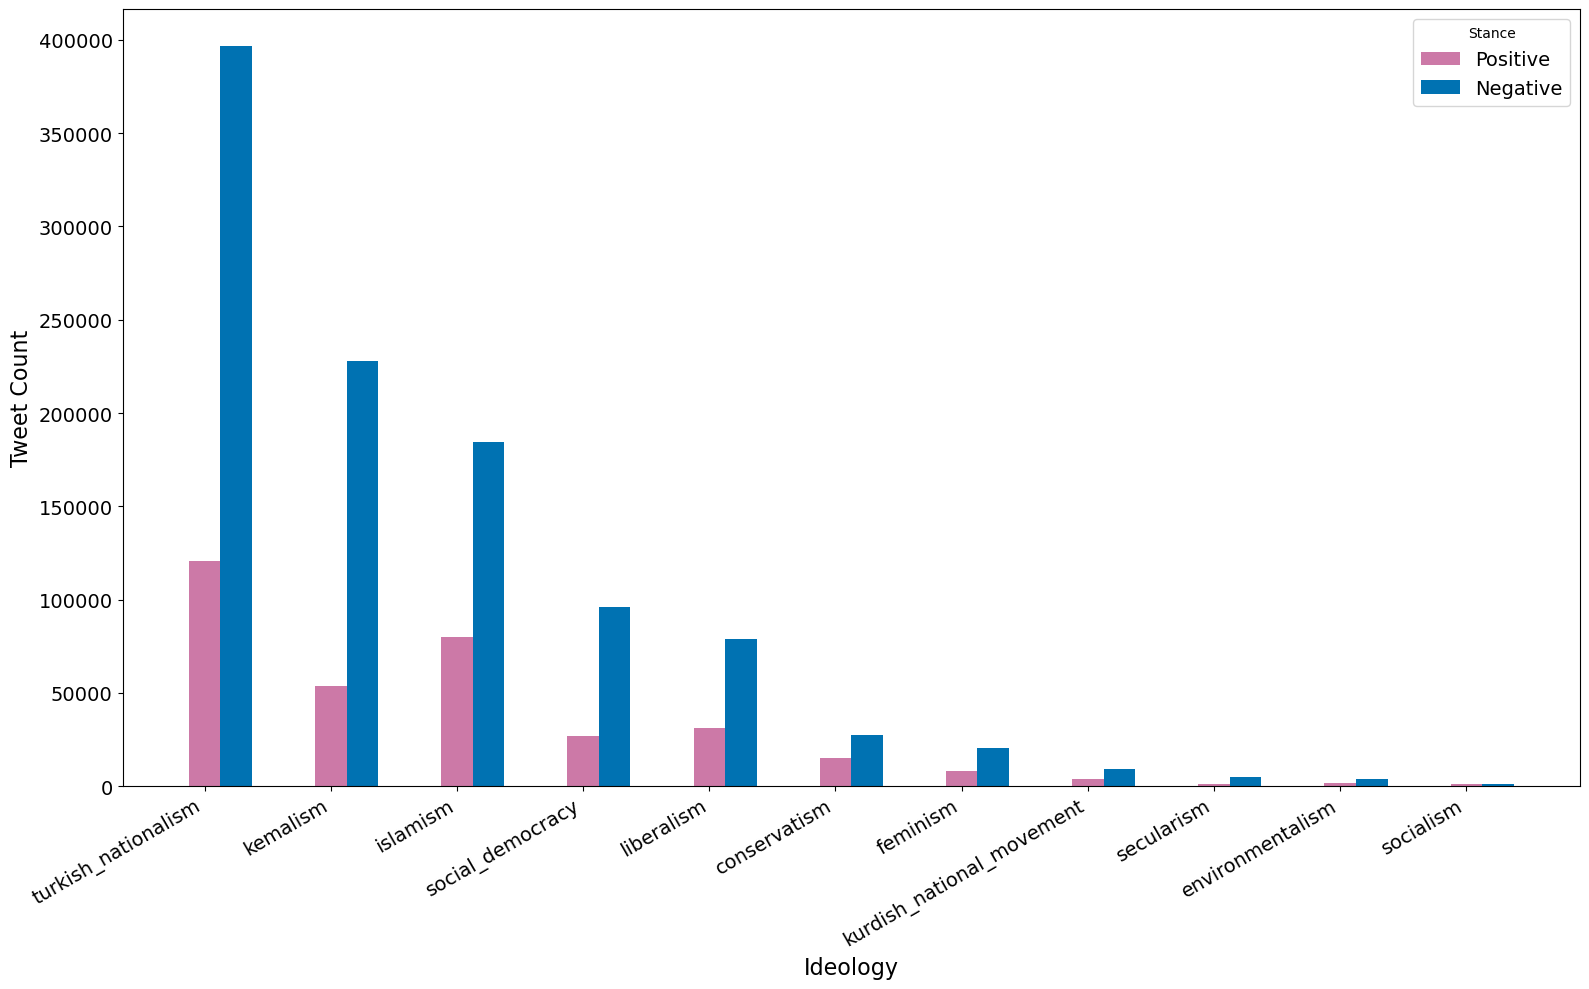

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate the total tweet count for sorting
ideology_stance_counts['total'] = ideology_stance_counts[1.0] + ideology_stance_counts[2.0]

# Sort the DataFrame based on the total tweet count
ideology_stance_counts_sorted = ideology_stance_counts.sort_values(by='total', ascending=False)

# Create a figure and axis with larger size for better readability
plt.figure(figsize=(16, 10))

# Number of ideologies after sorting
n_ideologies = len(ideology_stance_counts_sorted)

# The x locations for the groups
ind = np.arange(n_ideologies)

# The width of the bars
width = 0.25  # Adjust the width to fit three bars side by side

# Plotting the bars side by side
plt.bar(ind, ideology_stance_counts_sorted[1.0], width, label='Positive', color='#CC79A7')
plt.bar(ind + width, ideology_stance_counts_sorted[2.0], width, label='Negative', color='#0072B2')

# Add labels, title, and custom x-axis tick labels with larger font sizes
plt.xlabel('Ideology', fontsize=16)
plt.ylabel('Tweet Count', fontsize=16)
plt.xticks(ind, ideology_stance_counts_sorted.index, rotation=30, ha='right', fontsize=14)
plt.yticks(fontsize=14)

# Add a legend with larger font size
plt.legend(title='Stance', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()


#### Stance Distribution by Ideology (percentage)

In [29]:
# Calculate the sum of positive (1.0) and negative (2.0) tweets for each ideology
ideology_stance_counts['positive_negative_total'] = ideology_stance_counts[1.0] + ideology_stance_counts[2.0]

# Calculate the percentage of positive (1.0) and negative (2.0) tweets within the non-neutral tweets
ideology_stance_percentage = ideology_stance_counts[[1.0, 2.0]].div(ideology_stance_counts['positive_negative_total'], axis=0) * 100

# Display the percentages
print(ideology_stance_percentage)

stance_immigration               1.0        2.0
liberalism                 28.259124  71.740876
kurdish_national_movement  30.095995  69.904005
islamism                   30.266699  69.733301
turkish_nationalism        23.349343  76.650657
feminism                   28.185395  71.814605
environmentalism           30.910060  69.089940
socialism                  46.682654  53.317346
secularism                 18.374502  81.625498
social_democracy           21.985625  78.014375
kemalism                   19.099070  80.900930
conservatism               35.811449  64.188551


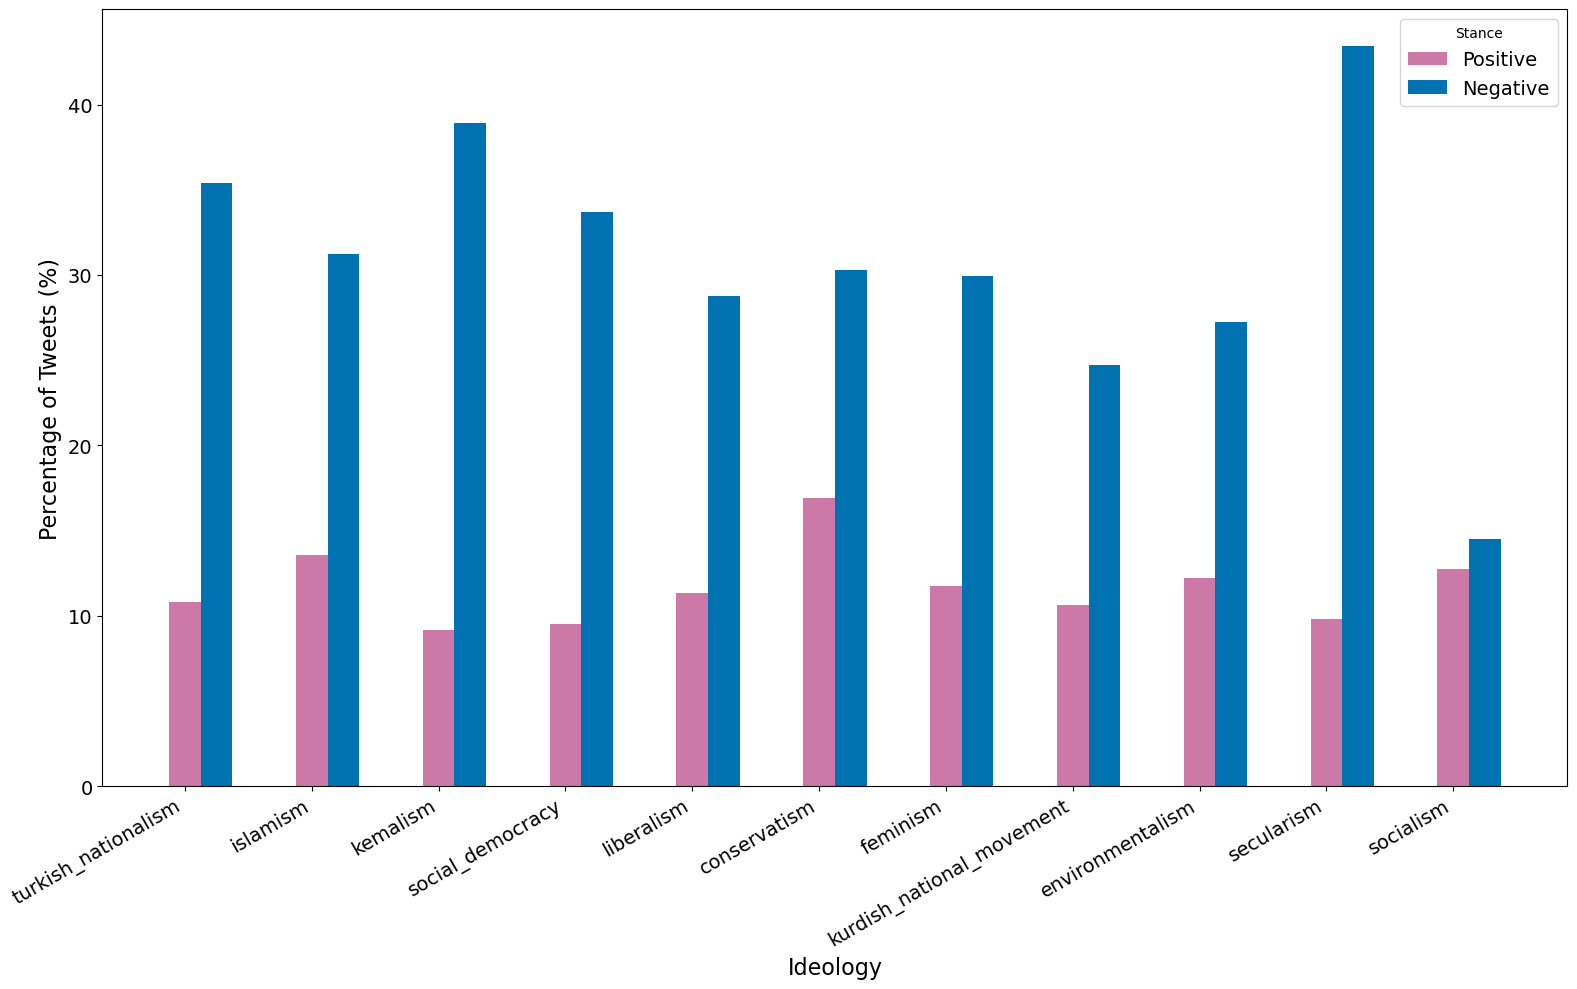

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the total tweet count (including neutral)
ideology_stance_counts['total'] = ideology_stance_counts[0.0] + ideology_stance_counts[1.0] + ideology_stance_counts[2.0]

# Sort the DataFrame based on the total tweet count
ideology_stance_counts_sorted = ideology_stance_counts.sort_values(by='total', ascending=False)

# Calculate the percentage of neutral (0.0), positive (1.0), and negative (2.0) tweets
ideology_stance_percentage_sorted = ideology_stance_counts_sorted[[0.0, 1.0, 2.0]].div(ideology_stance_counts_sorted['total'], axis=0) * 100

# Create a figure and axis with larger size for better readability
plt.figure(figsize=(16, 10))

# Number of ideologies after sorting
n_ideologies = len(ideology_stance_percentage_sorted)

# The x locations for the groups
ind = np.arange(n_ideologies)

# The width of the bars
width = 0.25  # Adjust the width since we now have three bars

# Plotting the bars side by side using percentages

plt.bar(ind + width, ideology_stance_percentage_sorted[1.0], width, label='Positive', color='#CC79A7')
plt.bar(ind + 2 * width, ideology_stance_percentage_sorted[2.0], width, label='Negative', color='#0072B2')

# Add labels, title, and custom x-axis tick labels with larger font sizes
plt.xlabel('Ideology', fontsize=16)
plt.ylabel('Percentage of Tweets (%)', fontsize=16)
plt.xticks(ind + width, ideology_stance_counts_sorted.index, rotation=30, ha='right', fontsize=14)
plt.yticks(fontsize=14)

# Add a legend with larger font size
plt.legend(title='Stance', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()


#### Proportion of Stance Categories by Ideologies

In [31]:
# Melt the DataFrame to handle ideological presence
df_melted = pd.melt(df_migration_updated, id_vars=['user_id', 'stance_immigration'], value_vars=['ideology_1', 'ideology_2', 'ideology_3'], var_name='ideology_type', value_name='ideology')

# Drop rows where ideology is NaN (i.e., where there wasn't a second or third ideology)
df_melted = df_melted.dropna(subset=['ideology'])

# Group by ideology and stance, and count occurrences
grouped = df_melted.groupby(['ideology', 'stance_immigration']).size().unstack(fill_value=0)

# Calculate proportions within each ideology
proportions = grouped.div(grouped.sum(axis=1), axis=0)

# Preview the proportions
print(proportions)

stance_immigration              0.0       1.0       2.0
ideology                                               
conservatism               0.528306  0.168921  0.302774
environmentalism           0.605691  0.121881  0.272428
feminism                   0.583099  0.117505  0.299396
islamism                   0.551783  0.135661  0.312557
kemalism                   0.519242  0.091820  0.388938
kurdish_national_movement  0.646388  0.106423  0.247189
liberalism                 0.599348  0.113221  0.287431
secularism                 0.467814  0.097786  0.434399
social_democracy           0.567784  0.095025  0.337191
socialism                  0.727540  0.127192  0.145268
turkish_nationalism        0.537814  0.107917  0.354269


In [32]:
df_melted

,user_id,stance_immigration,ideology_type,ideology
0,1599527577667895297,0.0,ideology_1,turkish_nationalism
1,1599527577667895297,1.0,ideology_1,turkish_nationalism
2,748843657298636800,1.0,ideology_1,turkish_nationalism
3,748843657298636800,0.0,ideology_1,turkish_nationalism
4,748843657298636800,0.0,ideology_1,turkish_nationalism
...,...,...,...,...
3853307,2721734494,0.0,ideology_3,turkish_nationalism
3853308,2721734494,0.0,ideology_3,turkish_nationalism
3853309,2721734494,2.0,ideology_3,turkish_nationalism
3853310,2721734494,0.0,ideology_3,turkish_nationalism


In [33]:
# Calculate the average proportion across all ideologies
average_proportion = proportions.mean()

# Calculate the difference from the average for each ideology presence
proportion_diff_from_avg = proportions.sub(average_proportion, axis=1)

# Preview the differences
print(proportion_diff_from_avg)

stance_immigration              0.0       1.0       2.0
ideology                                               
conservatism              -0.047586  0.052252 -0.004666
environmentalism           0.029799  0.005213 -0.035012
feminism                   0.007207  0.000837 -0.008044
islamism                  -0.024109  0.018992  0.005117
kemalism                  -0.056650 -0.024848  0.081498
kurdish_national_movement  0.070496 -0.010245 -0.060251
liberalism                 0.023456 -0.003448 -0.020009
secularism                -0.108077 -0.018882  0.126959
social_democracy          -0.008108 -0.021643  0.029751
socialism                  0.151648  0.010523 -0.162172
turkish_nationalism       -0.038078 -0.008751  0.046829


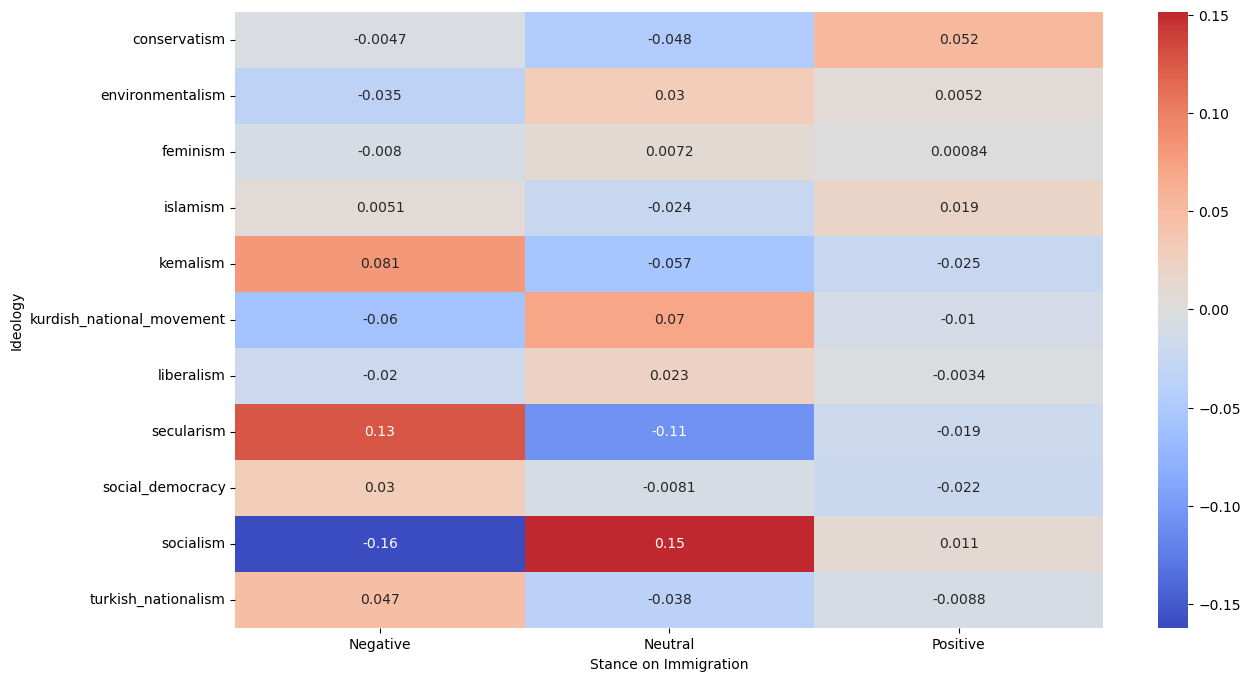

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reorder and rename the columns
proportion_diff_from_avg = proportion_diff_from_avg[[2.0, 0.0, 1.0]]
proportion_diff_from_avg.columns = ['Negative','Neutral','Positive']

# Create a heatmap of the differences in proportions
plt.figure(figsize=(14, 8))
sns.heatmap(proportion_diff_from_avg, annot=True, cmap='coolwarm', center=0)

# Add titles and labels

plt.xlabel('Stance on Immigration')
plt.ylabel('Ideology')

# Display the plot
plt.show()


### User-Level Analysis

In [40]:
import pandas as pd

# Assuming df_migration_updated is your DataFrame and it contains 'user_id' and 'stance_immigration' columns

# Step 1: Group by user_id and calculate the counts of each stance (positive, negative, neutral)
user_stance_counts = df_migration_updated.groupby(['user_id', 'stance_immigration']).size().unstack(fill_value=0)

# Step 2: Define a function to classify users based on their tweet stances
def classify_user(row):
    if row.get(1.0, 0) > row.get(2.0, 0):
        return 'Pro'
    elif row.get(2.0, 0) > row.get(1.0, 0):
        return 'Anti'
    else:
        return 'Neutral'

# Step 3: Apply the classification function to each user's stance counts
user_stance_counts['stance_user'] = user_stance_counts.apply(classify_user, axis=1)

# Step 4: Merge this classification back to your original DataFrame (if needed)
df_migration_updated = df_migration_updated.merge(user_stance_counts['stance_user'], on='user_id', how='left')

# Preview the updated DataFrame
print(df_migration_updated[['user_id', 'stance_immigration', 'stance_user']].head())


               user_id  stance_immigration stance_user
0  1599527577667895297                 0.0         Pro
1  1599527577667895297                 1.0         Pro
2   748843657298636800                 1.0         Pro
3   748843657298636800                 0.0         Pro
4   748843657298636800                 0.0         Pro


In [41]:
df_migration_updated['stance_user'].value_counts()

stance_user
Anti       1022753
Pro         171691
Neutral      90023
Name: count, dtype: int64

In [37]:
user_stance_counts = df_migration_updated[['user_id', 'stance_user']].drop_duplicates()
stance_user_counts = user_stance_counts['stance_user'].value_counts()

# Display the counts
print(stance_user_counts)

stance_user
Anti       48872
Neutral    23829
Pro        17126
Name: count, dtype: int64


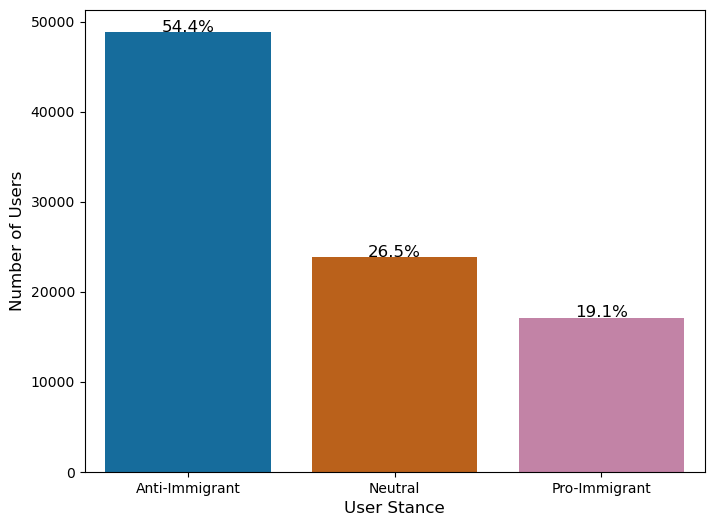

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of unique users for each stance_user category
user_stance_counts = df_migration_updated[['user_id', 'stance_user']].drop_duplicates()
stance_user_counts = user_stance_counts['stance_user'].value_counts()

# Rename the stance categories
stance_user_counts = stance_user_counts.rename(index={'Pro': 'Pro-Immigrant', 'Anti': 'Anti-Immigrant'})

# Calculate the percentages
total_users = stance_user_counts.sum()
stance_user_percentages = (stance_user_counts / total_users) * 100

# Define the custom color palette
custom_palette = ['#0072B2', '#D55E00', '#CC79A7']

# Plot the distribution using the custom color palette
plt.figure(figsize=(8, 6))
sns.barplot(x=stance_user_counts.index, y=stance_user_counts.values, palette=custom_palette[:len(stance_user_counts)])

# Add titles and labels
plt.xlabel('User Stance', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)

# Add percentage labels on top of each bar
for i in range(len(stance_user_counts)):
    plt.text(i, stance_user_counts.values[i] + 50, f'{stance_user_percentages.values[i]:.1f}%', ha='center', fontsize=12)

# Display the plot
plt.show()


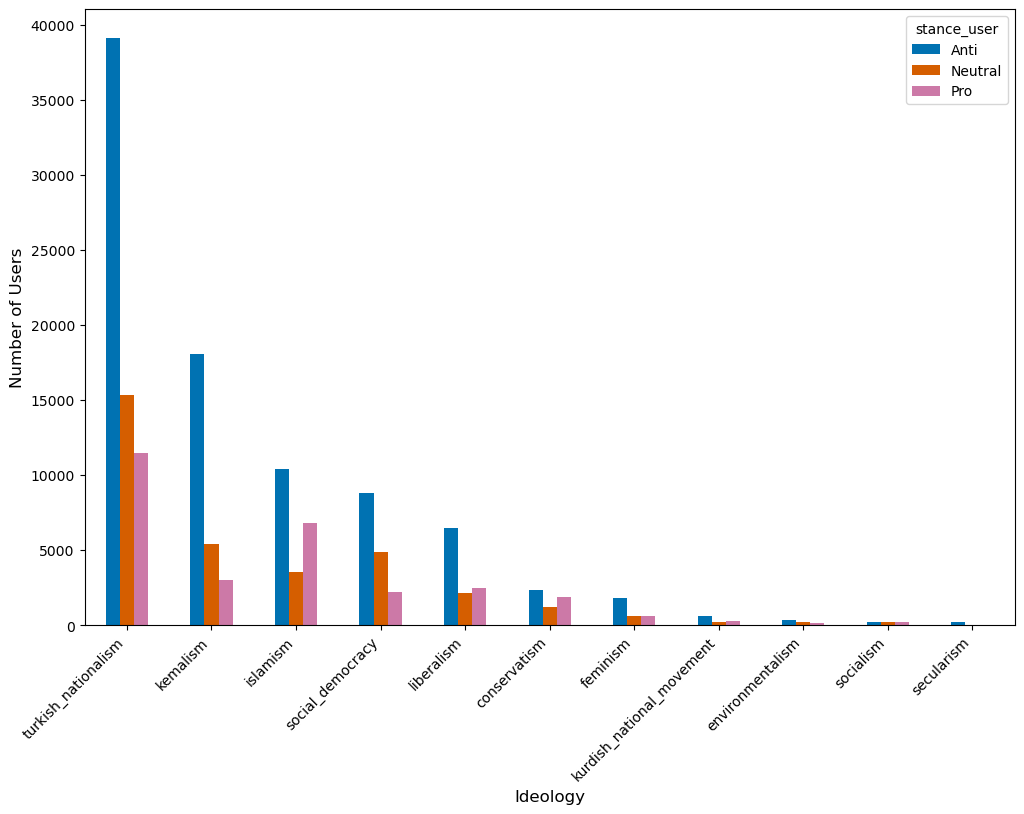

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reshape the DataFrame to have one row per user-ideology pair
ideology_presence = df_migration_updated.melt(id_vars=['user_id', 'stance_user'], 
                                              value_vars=['ideology_1', 'ideology_2', 'ideology_3'], 
                                              value_name='ideology').dropna().drop_duplicates()

# Count the number of users for each stance (Neutral, Pro-Immigrant, Anti-Immigrant) within each ideology
user_stance_counts_by_ideology = ideology_presence.groupby(['ideology', 'stance_user'])['user_id'].nunique().unstack(fill_value=0)

# Calculate the total number of users for each ideology
user_stance_counts_by_ideology['Total'] = user_stance_counts_by_ideology.sum(axis=1)

# Sort the ideologies by the total user count
user_stance_counts_by_ideology = user_stance_counts_by_ideology.sort_values('Total', ascending=False)

# Drop the 'Total' column as it is no longer needed for plotting
user_stance_counts_by_ideology = user_stance_counts_by_ideology.drop(columns='Total')

# Define the custom color palette
custom_palette = ['#0072B2', '#D55E00', '#CC79A7']

# Plot the grouped bar chart using the custom color palette
user_stance_counts_by_ideology.plot(kind='bar', stacked=False, figsize=(12, 8), color=custom_palette)

# Add titles and labels
plt.xlabel('Ideology', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()


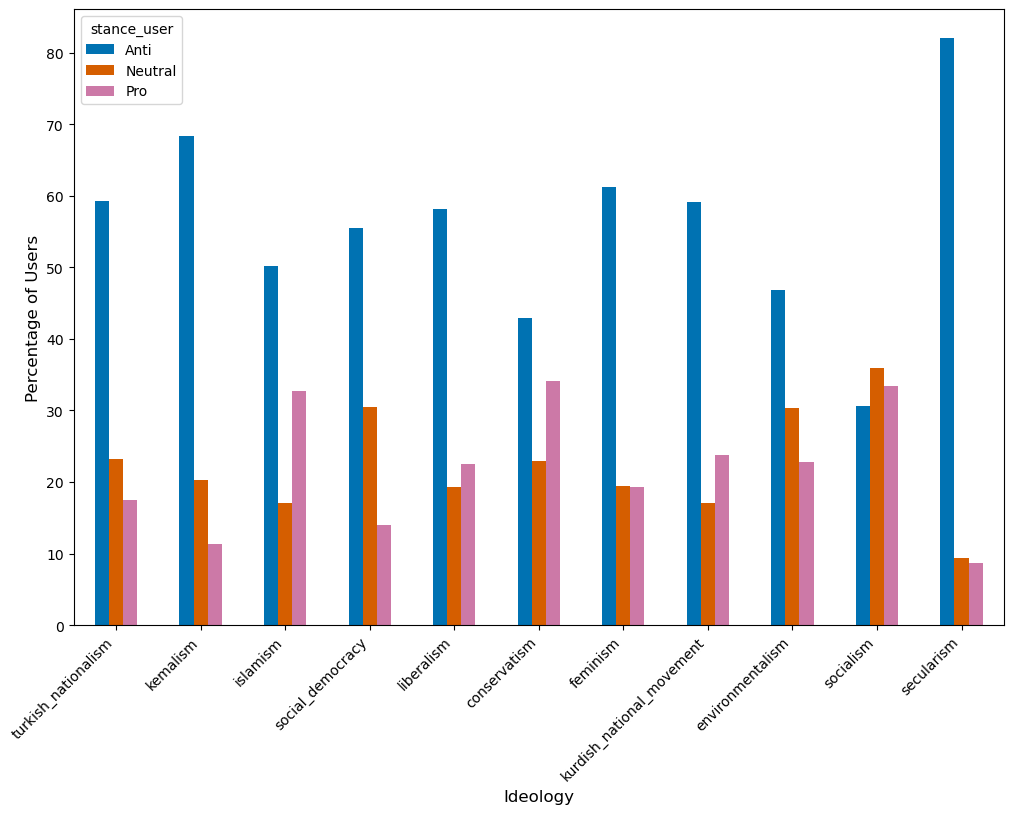

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reshape the DataFrame to have one row per user-ideology pair
ideology_presence = df_migration_updated.melt(id_vars=['user_id', 'stance_user'], 
                                              value_vars=['ideology_1', 'ideology_2', 'ideology_3'], 
                                              value_name='ideology').dropna().drop_duplicates()

# Count the number of users for each stance (Neutral, Pro-Immigrant, Anti-Immigrant) within each ideology
user_stance_counts_by_ideology = ideology_presence.groupby(['ideology', 'stance_user'])['user_id'].nunique().unstack(fill_value=0)

# Calculate the total number of users for each ideology
user_stance_counts_by_ideology['Total'] = user_stance_counts_by_ideology.sum(axis=1)

# Sort the ideologies by the total user count
user_stance_counts_by_ideology = user_stance_counts_by_ideology.sort_values('Total', ascending=False)

# Drop the 'Total' column as it is no longer needed for plotting
user_stance_counts_by_ideology = user_stance_counts_by_ideology.drop(columns='Total')

# Calculate the percentages within each ideology
user_stance_percentages_by_ideology = user_stance_counts_by_ideology.div(user_stance_counts_by_ideology.sum(axis=1), axis=0) * 100

# Define the custom color palette
custom_palette = ['#0072B2', '#D55E00', '#CC79A7']

# Plot the grouped bar chart showing percentages using the custom color palette
user_stance_percentages_by_ideology.plot(kind='bar', stacked=False, figsize=(12, 8), color=custom_palette)

# Add titles and labels

plt.xlabel('Ideology', fontsize=12)
plt.ylabel('Percentage of Users', fontsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()


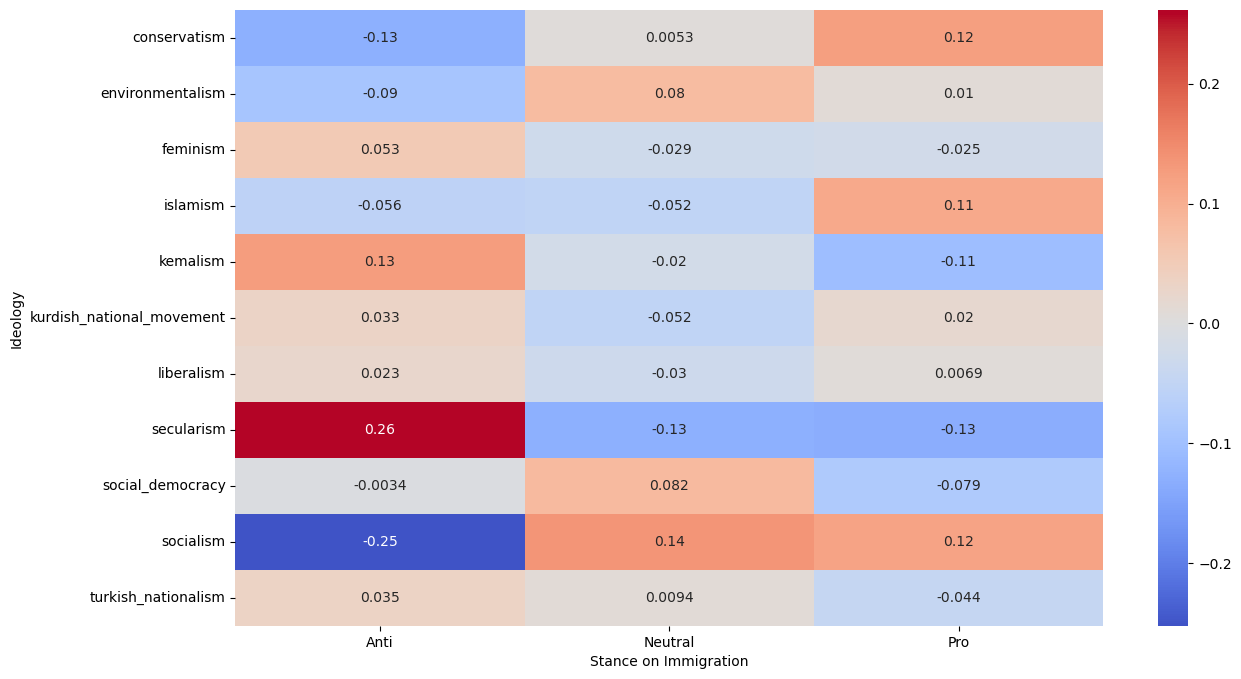

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reshape the DataFrame to have one row per user-ideology pair
ideology_presence = df_migration_updated.melt(id_vars=['user_id', 'stance_user'], 
                                              value_vars=['ideology_1', 'ideology_2', 'ideology_3'], 
                                              value_name='ideology').dropna().drop_duplicates()

# Count the number of users for each stance (Pro, Neutral, Anti) within each ideology
user_stance_counts_by_ideology = ideology_presence.groupby(['ideology', 'stance_user'])['user_id'].nunique().unstack(fill_value=0)

# Calculate proportions within each ideology (excluding neutral)
user_stance_proportions_by_ideology = user_stance_counts_by_ideology.div(user_stance_counts_by_ideology.sum(axis=1), axis=0)

# Calculate the average proportions across all ideologies
average_user_proportions = user_stance_proportions_by_ideology.mean()

# Calculate the difference from the average for each ideology
user_proportion_diff_from_avg = user_stance_proportions_by_ideology.sub(average_user_proportions, axis=1)

# Create a heatmap of the differences in proportions
plt.figure(figsize=(14, 8))
sns.heatmap(user_proportion_diff_from_avg, annot=True, cmap='coolwarm', center=0)

# Add titles and labels
plt.xlabel('Stance on Immigration')
plt.ylabel('Ideology')

# Display the plot
plt.show()


### Tweet Distribution Over Time

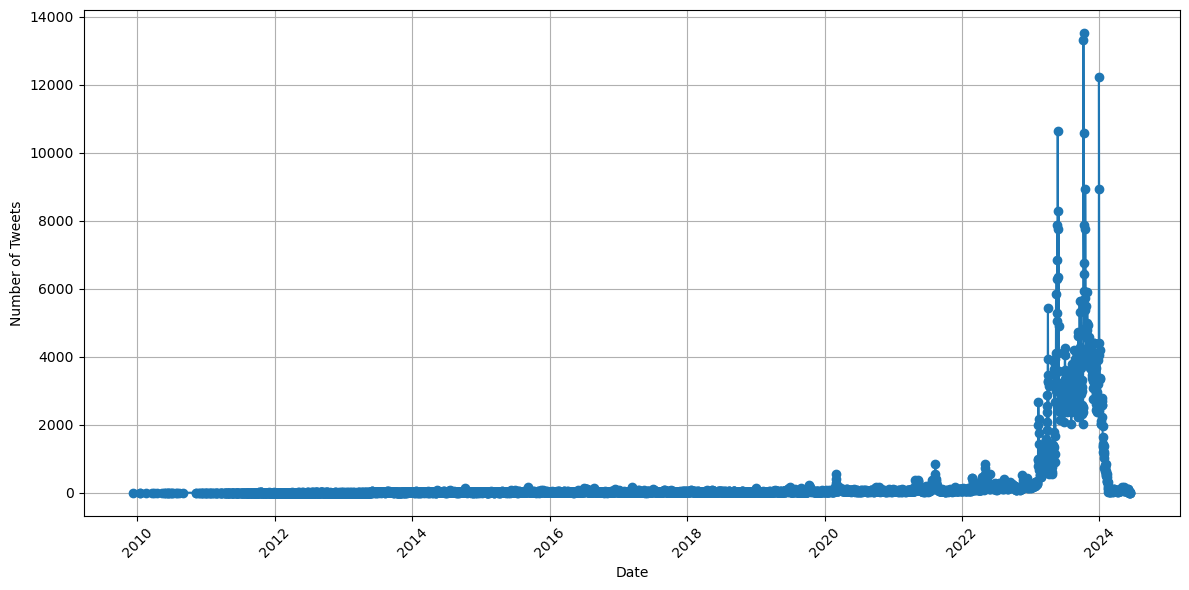

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure tweet_date is in datetime format
df_migration_updated['tweet_date'] = pd.to_datetime(df_migration_updated['tweet_date'])

# Group by date and count the number of tweets per day
tweet_counts = df_migration_updated.groupby(df_migration_updated['tweet_date'].dt.date).size()

# Plot the tweet count distribution over time
plt.figure(figsize=(12, 6))
plt.plot(tweet_counts.index, tweet_counts.values, marker='o')


plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()


#### Positive-Negative Tweet Distribution Over Time

/Users/alkancan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alkancan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alkancan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alkancan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

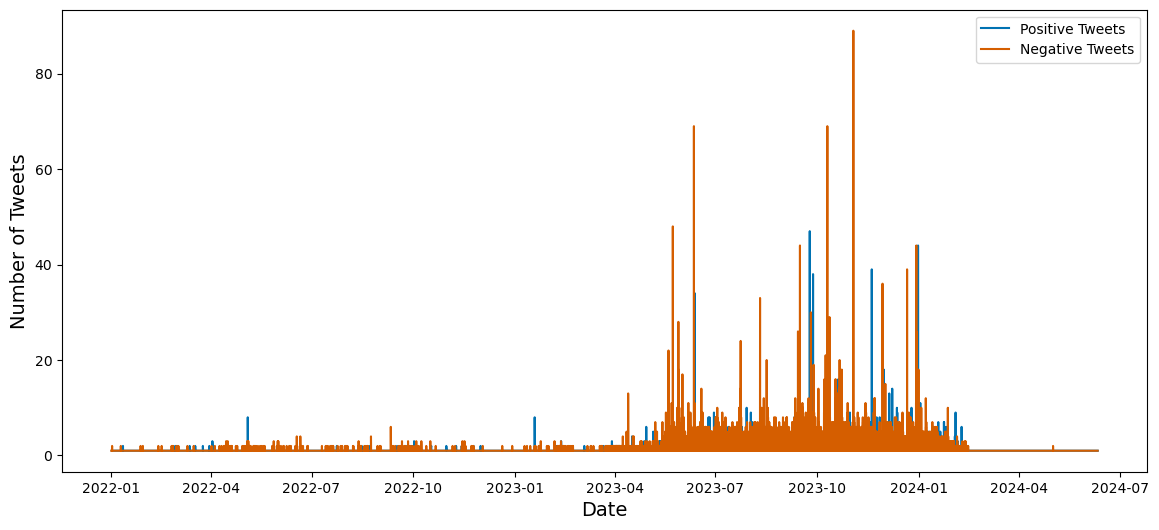

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the tweet_date column is in datetime format
df_migration_updated['tweet_date'] = pd.to_datetime(df_migration_updated['tweet_date'])

# Filter the dataset for positive and negative tweets starting from 2022
start_date = '2022-01-01'
positive_tweets = df_migration_updated[(df_migration_updated['stance_immigration'] == 1.0) & (df_migration_updated['tweet_date'] >= start_date)]
negative_tweets = df_migration_updated[(df_migration_updated['stance_immigration'] == 2.0) & (df_migration_updated['tweet_date'] >= start_date)]

# Group the tweets by date and count the number of tweets per day
positive_tweet_counts = positive_tweets.groupby('tweet_date').size()
negative_tweet_counts = negative_tweets.groupby('tweet_date').size()

# Plot the tweet counts over time
plt.figure(figsize=(14, 6))

sns.lineplot(x=positive_tweet_counts.index, y=positive_tweet_counts.values, label='Positive Tweets', color='#0072B2')
sns.lineplot(x=negative_tweet_counts.index, y=negative_tweet_counts.values, label='Negative Tweets', color='#D55E00')

# Add titles and labels

plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Tweets', fontsize=14)

# Display the plot
plt.show()



### Topic Distribution

In [48]:
df_migration_updated.big5.value_counts()

big5
[]                                                          871879
[foreign_affairs]                                           295893
[economy]                                                    51448
[internal_affairs]                                           26500
[national_defense, foreign_affairs]                          12947
[national_defense]                                           12903
[foreign_affairs, economy]                                    5002
[corruption]                                                  3322
[internal_affairs, national_defense]                          1556
[internal_affairs, foreign_affairs]                           1104
[corruption, economy]                                          974
[internal_affairs, economy]                                    271
[internal_affairs, corruption]                                 229
[national_defense, economy]                                    148
[internal_affairs, national_defense, foreign_affairs]    

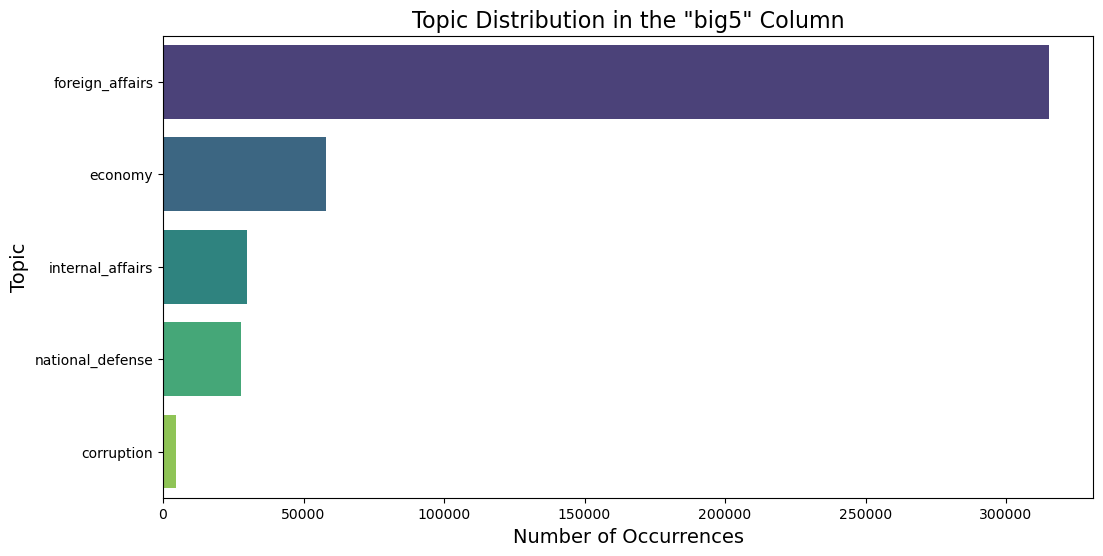

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Updated processing function to handle both strings and lists
def process_list_column(value):
    if isinstance(value, list):
        # If the value is already a list, return it as is
        return value
    elif value == '[]':
        # If the value is an empty list in string form, return NaN
        return np.nan
    else:
        # Otherwise, assume it's a string and process it
        return value.strip('[]').replace("'", "").split(', ')

# Apply the processing function to the 'big5' column
df_migration_updated['big5'] = df_migration_updated['big5'].apply(process_list_column)

# Explode the lists into separate rows
exploded_df = df_migration_updated.explode('big5')

# Drop rows where 'big5' is NaN (previously empty lists)
exploded_df = exploded_df.dropna(subset=['big5'])

# Count the occurrences of each topic
topic_counts = exploded_df['big5'].value_counts()

# Convert the counts to a DataFrame for easier plotting
topic_df = topic_counts.reset_index()
topic_df.columns = ['Topic', 'Count']

# Plot the topic distribution
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Topic', data=topic_df, palette='viridis')

# Add titles and labels
plt.title('Topic Distribution in the "big5" Column', fontsize=16)
plt.xlabel('Number of Occurrences', fontsize=14)
plt.ylabel('Topic', fontsize=14)

# Display the plot
plt.show()



#### Negative-Positive Topic Distribution

In [51]:
# Count the occurrences of each topic in positive and negative tweets
positive_topic_counts = exploded_positive['big5'].value_counts()
negative_topic_counts = exploded_negative['big5'].value_counts()


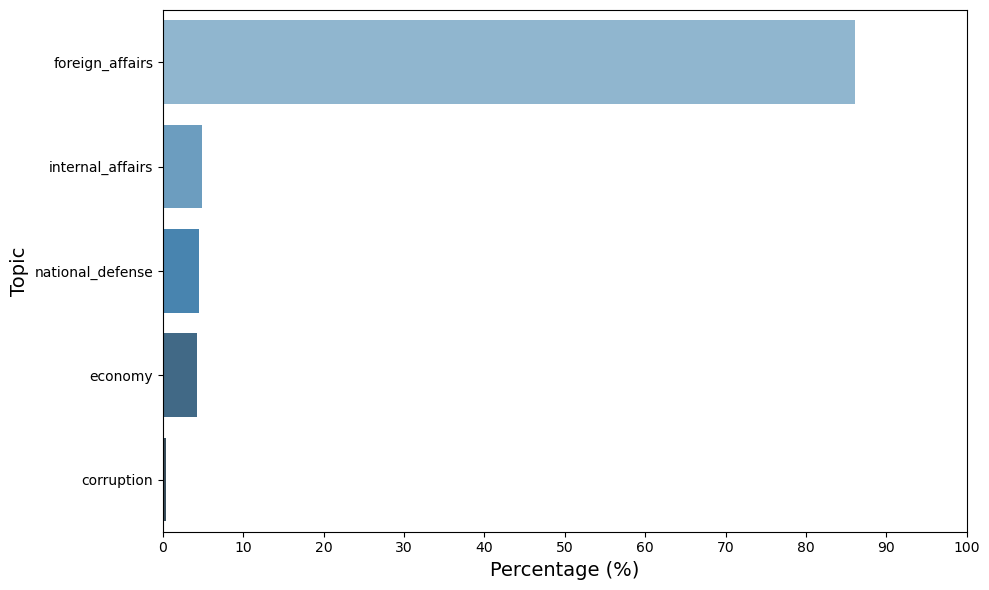

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot for Positive Tweets with 10% bins
plt.figure(figsize=(10, 6))
sns.barplot(x=positive_topic_percentages.values, y=positive_topic_percentages.index, palette='Blues_d')
plt.xlabel('Percentage (%)', fontsize=14)
plt.ylabel('Topic', fontsize=14)


# Set the x-axis ticks to be in 10% increments
plt.xticks(ticks=range(0, 101, 10), labels=[f'{i}' for i in range(0, 101, 10)])

# Display the plot
plt.tight_layout()
plt.show()


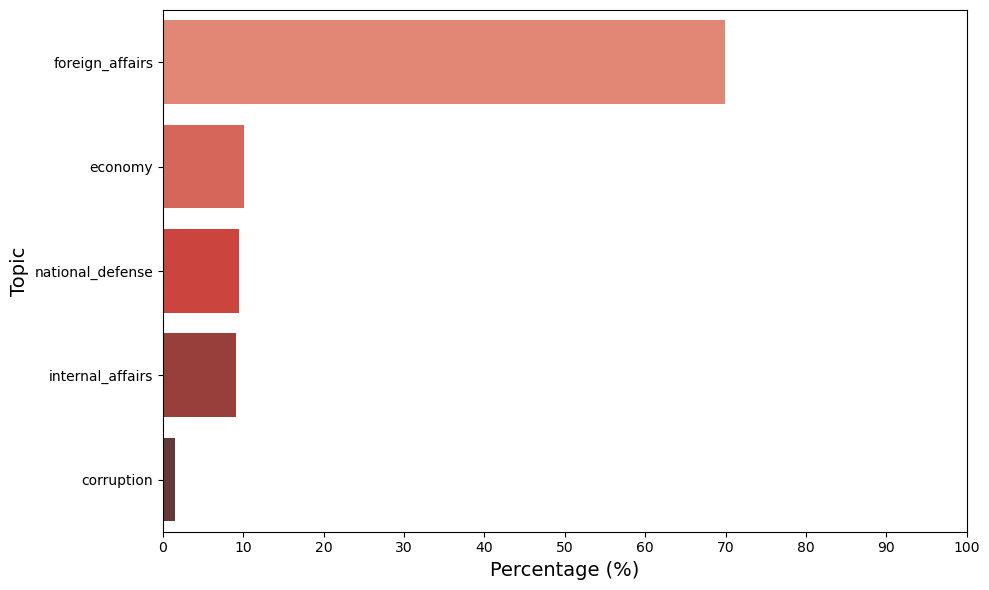

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot for Negative Tweets
plt.figure(figsize=(10, 6))
sns.barplot(x=negative_topic_percentages.values, y=negative_topic_percentages.index, palette='Reds_d')
plt.xlabel('Percentage (%)', fontsize=14)
plt.ylabel('Topic', fontsize=14)


plt.xticks(ticks=range(0, 101, 10), labels=[f'{i}' for i in range(0, 101, 10)])

# Display the plot
plt.tight_layout()
plt.show()


### Welfare-Related Topic Distribution

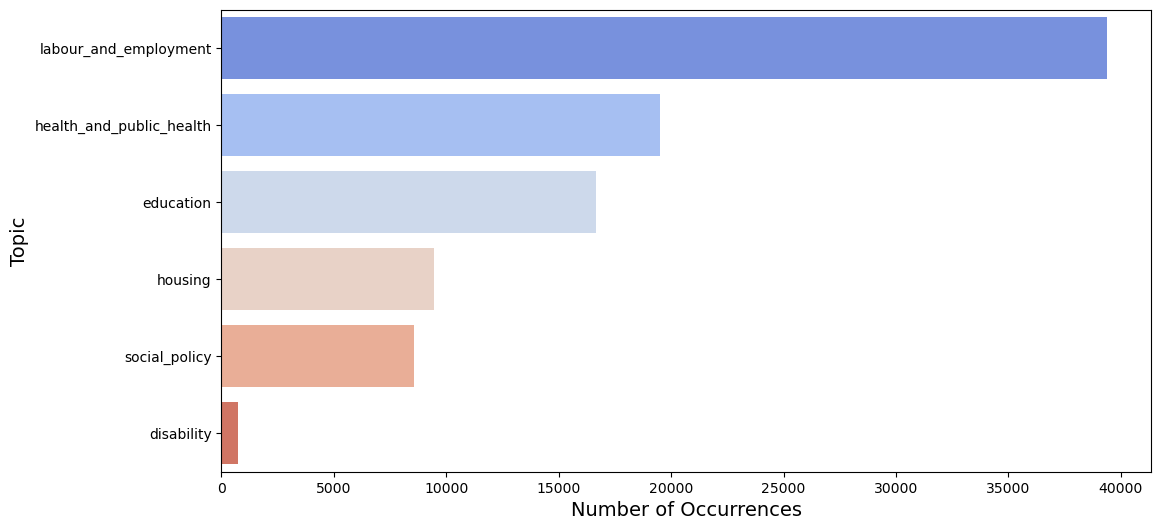

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ast

# A function to process the 'welfare' column, ensuring that it's in list format
def process_welfare_column(value):
    try:
        # If the value is a string and not an empty list, convert it to a list
        if isinstance(value, str) and value != "[]":
            processed_value = ast.literal_eval(value)
            if isinstance(processed_value, list):
                return processed_value if processed_value else np.nan
        # If it's already a list, just return it if it's not empty
        elif isinstance(value, list):
            return value if value else np.nan
    except (ValueError, SyntaxError):
        pass
    return np.nan

# Apply the processing function to the 'welfare' column
df_migration_updated['welfare'] = df_migration_updated['welfare'].apply(process_welfare_column)

# Explode the lists into separate rows
exploded_welfare_df = df_migration_updated.explode('welfare')

# Drop any NaN values that resulted from empty lists
exploded_welfare_df = exploded_welfare_df.dropna(subset=['welfare'])

# Count the occurrences of each welfare topic
welfare_topic_counts = exploded_welfare_df['welfare'].value_counts()

# Plot the distribution of welfare topics
plt.figure(figsize=(12, 6))
sns.barplot(x=welfare_topic_counts.values, y=welfare_topic_counts.index, palette='coolwarm')

# Add titles and labels

plt.xlabel('Number of Occurrences', fontsize=14)
plt.ylabel('Topic', fontsize=14)

# Display the plot
plt.show()


#### Welfare-Related Positive-Negative Topic Distribution

In [60]:
# Filter the dataset for positive and negative tweets
positive_tweets = df_migration_updated[df_migration_updated['stance_immigration'] == 1.0]
negative_tweets = df_migration_updated[df_migration_updated['stance_immigration'] == 2.0]


In [56]:
# Define the processing function as before
def process_welfare_column(value):
    try:
        # If the value is a string and not an empty list, convert it to a list
        if isinstance(value, str) and value != "[]":
            processed_value = ast.literal_eval(value)
            if isinstance(processed_value, list):
                return processed_value if processed_value else np.nan
        # If it's already a list, just return it if it's not empty
        elif isinstance(value, list):
            return value if value else np.nan
    except (ValueError, SyntaxError):
        pass
    return np.nan

# Apply the processing function to the 'welfare' column for both positive and negative tweets
positive_tweets['welfare'] = positive_tweets['welfare'].apply(process_welfare_column)
negative_tweets['welfare'] = negative_tweets['welfare'].apply(process_welfare_column)

# Explode the lists into separate rows
exploded_positive_welfare = positive_tweets.explode('welfare')
exploded_negative_welfare = negative_tweets.explode('welfare')

# Drop any NaN values that resulted from empty lists
exploded_positive_welfare = exploded_positive_welfare.dropna(subset=['welfare'])
exploded_negative_welfare = exploded_negative_welfare.dropna(subset=['welfare'])


/var/folders/1z/dpf61nyn057547f_7c8_h6th0000gn/T/ipykernel_93947/1998284669.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_tweets['welfare'] = positive_tweets['welfare'].apply(process_welfare_column)
/var/folders/1z/dpf61nyn057547f_7c8_h6th0000gn/T/ipykernel_93947/1998284669.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_tweets['welfare'] = negative_tweets['welfare'].apply(process_welfare_column)


In [57]:
df_migration_updated[df_migration_updated['stance_immigration'] == 1.0]
negative_tweets = df_migration_updated[df_migration_updated['stance_immigration'] == 2.0]

def process_welfare_column(value):
    try:
        # If the value is a string and not an empty list, convert it to a list
        if isinstance(value, str) and value != "[]":
            processed_value = ast.literal_eval(value)
            if isinstance(processed_value, list):
                return processed_value if processed_value else np.nan
        # If it's already a list, just return it if it's not empty
        elif isinstance(value, list):
            return value if value else np.nan
    except (ValueError, SyntaxError):
        pass
    return np.nan

# Apply the processing function to the 'welfare' column for both positive and negative tweets
positive_tweets['welfare'] = positive_tweets['welfare'].apply(process_welfare_column)
negative_tweets['welfare'] = negative_tweets['welfare'].apply(process_welfare_column)

# Explode the lists into separate rows
exploded_positive_welfare = positive_tweets.explode('welfare')
exploded_negative_welfare = negative_tweets.explode('welfare')

# Drop any NaN values that resulted from empty lists
exploded_positive_welfare = exploded_positive_welfare.dropna(subset=['welfare'])
exploded_negative_welfare = exploded_negative_welfare.dropna(subset=['welfare'])
positive_welfare_topic_counts = exploded_positive_welfare['welfare'].value_counts()
negative_welfare_topic_counts = exploded_negative_welfare['welfare'].value_counts()
import matplotlib.pyplot as plt
import seaborn as sns



/var/folders/1z/dpf61nyn057547f_7c8_h6th0000gn/T/ipykernel_93947/2805882825.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_tweets['welfare'] = positive_tweets['welfare'].apply(process_welfare_column)
/var/folders/1z/dpf61nyn057547f_7c8_h6th0000gn/T/ipykernel_93947/2805882825.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_tweets['welfare'] = negative_tweets['welfare'].apply(process_welfare_column)


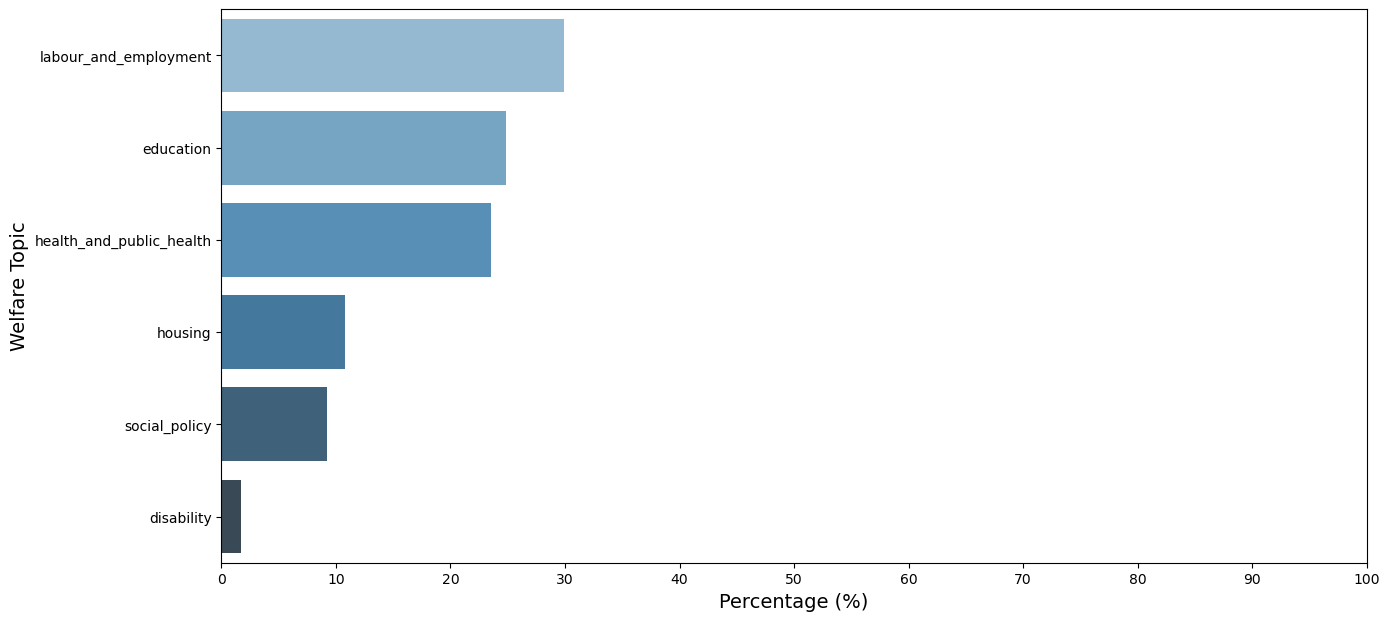

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate percentages
positive_welfare_topic_percentages = (positive_welfare_topic_counts / positive_welfare_topic_counts.sum()) * 100
negative_welfare_topic_percentages = (negative_welfare_topic_counts / negative_welfare_topic_counts.sum()) * 100

# Create a figure with subplots
plt.figure(figsize=(14, 12))

# Plot for Positive Tweets with percentages and 10% bins
plt.subplot(2, 1, 1)
sns.barplot(x=positive_welfare_topic_percentages.values, y=positive_welfare_topic_percentages.index, palette='Blues_d')
plt.xlabel('Percentage (%)', fontsize=14)
plt.ylabel('Welfare Topic', fontsize=14)


# Set the x-axis ticks to be in 10% increments
plt.xticks(ticks=range(0, 101, 10), labels=[f'{i}' for i in range(0, 101, 10)])

# Plot for Negative Tweets with percentages and 10% bins


# Set the x-axis ticks to be in 10% increments
plt.xticks(ticks=range(0, 101, 10), labels=[f'{i}' for i in range(0, 101, 10)])

# Display the plot
plt.tight_layout()
plt.show()


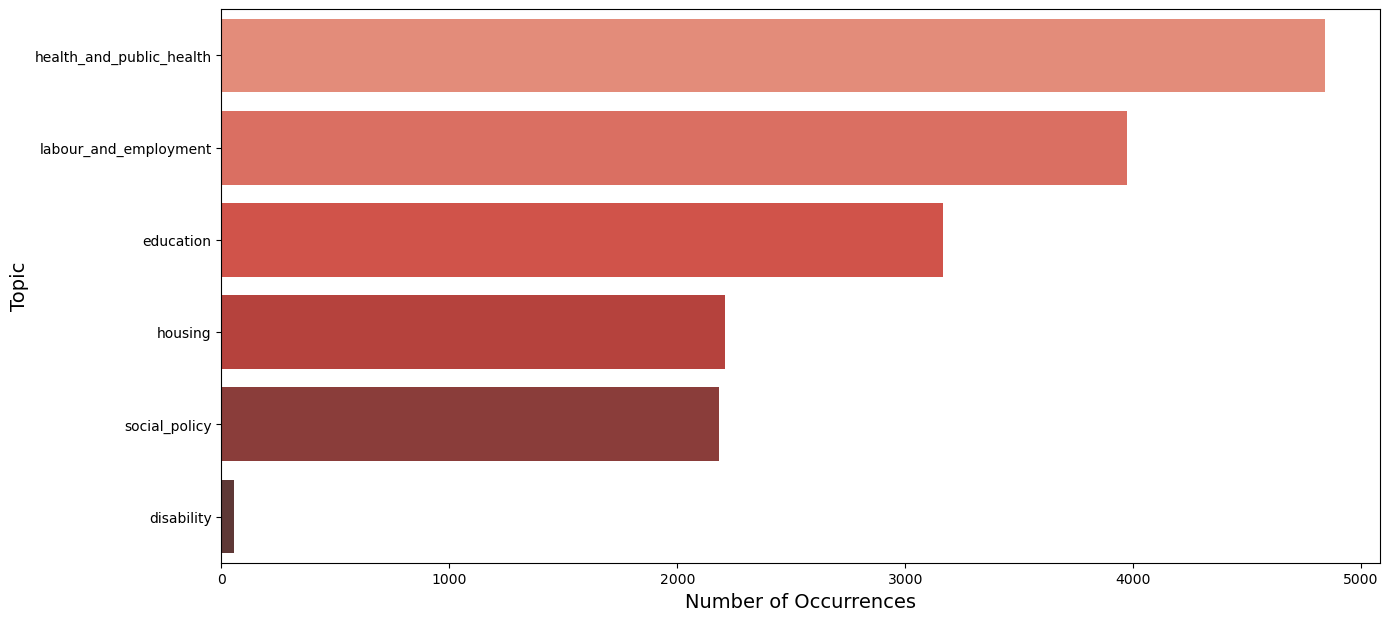

In [59]:
plt.figure(figsize=(14, 12))
plt.subplot(2, 1, 2)
sns.barplot(x=negative_welfare_topic_counts.values, y=negative_welfare_topic_counts.index, palette='Reds_d')
plt.xlabel('Number of Occurrences', fontsize=14)
plt.ylabel('Topic', fontsize=14)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

### Emotion Distribution

In [61]:
df_migration_updated.emotions.value_counts()

emotions
[]                                               456191
[ofke]                                           455166
[ofke, onaylamama]                               135461
[onaylamama]                                      66749
[ofke, igrenme]                                   52494
                                                  ...  
[pismanlik, ofke, igrenme, onaylamama]                1
[uzuntu, kaygi, umutsuzluk, ofke, onaylamama]         1
[sevgi, uzuntu, ofke, igrenme, onaylamama]            1
[pismanlik, igrenme, onaylamama]                      1
[sevgi, minnet, arzu]                                 1
Name: count, Length: 333, dtype: int64

In [62]:
import pandas as pd
import ast

# Assuming 'emotions' is the column containing the list of emotions
# First, convert the string representations of lists into actual lists
df_migration_updated['emotions'] = df_migration_updated['emotions'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Explode the lists into separate rows so each emotion is in its own row
exploded_emotions = df_migration_updated.explode('emotions')

# Get unique emotions
unique_emotions = exploded_emotions['emotions'].dropna().unique()

# Print unique emotions
print(unique_emotions)


['minnet' 'ofke' 'uzuntu' 'arzu' 'onaylamama' 'pismanlik' 'igrenme' 'notr'
 'saskinlik' 'umutsuzluk' 'umut' 'sevgi' 'korku' 'kaygi' 'mutluluk'
 'onaylama' 'utanc']


In [67]:
emotion_translation = {
    'minnet': 'Gratitude',
    'ofke': 'Anger',
    'uzuntu': 'Sadness',
    'arzu': 'Desire',
    'onaylamama': 'Disapproval',
    'pismanlik': 'Regret',
    'igrenme': 'Disgust',
    'notr': 'Neutral',
    'saskinlik': 'Surprise',
    'umutsuzluk': 'Hopelessness',
    'umut': 'Hope',
    'sevgi': 'Love',
    'korku': 'Fear',
    'kaygi': 'Anxiety',
    'mutluluk': 'Happiness',
    'onaylama': 'Approval',
    'utanc': 'Shame'
}

# Function to process and replace emotions in the dataset
def translate_emotions(emotion_list):
    if not emotion_list or emotion_list == []:  # Check for empty lists
        return ['No Emotion']
    translated_emotions = [emotion_translation.get(emotion, emotion) for emotion in emotion_list]
    return translated_emotions

# Apply the function to the 'emotions' column
df_migration_updated['emotions'] = df_migration_updated['emotions'].apply(translate_emotions)

# Display the updated dataset
df_migration_updated.head()

,user_id,screen_name,name,location,pcode,gender,age_group,isOrg,m3_pred,author_id,...,feminism,environmentalism,socialism,secularism,social_democracy,kemalism,conservatism,stance_user_x,stance_user_y,stance_user
0,1599527577667895297,Halilkamaci63,Halil Kamacı 🇹🇷,"Bahçelievler, Şanlıurfa",34,male,>=40,0.1677,full,1599527577667895297,...,0,0,0,0,0,0,0,Pro,Pro,Pro
1,1599527577667895297,Halilkamaci63,Halil Kamacı 🇹🇷,"Bahçelievler, Şanlıurfa",34,male,>=40,0.1677,full,1599527577667895297,...,0,0,0,0,0,0,0,Pro,Pro,Pro
2,748843657298636800,Malcolmxll,JİBARO,,,male,<=18,0.4243,full,None,...,0,0,0,0,0,0,0,Pro,Pro,Pro
3,748843657298636800,Malcolmxll,JİBARO,,,male,<=18,0.4243,full,None,...,0,0,0,0,0,0,0,Pro,Pro,Pro
4,748843657298636800,Malcolmxll,JİBARO,,,male,<=18,0.4243,full,None,...,0,0,0,0,0,0,0,Pro,Pro,Pro


In [68]:
df_migration_updated.emotions.value_counts()

emotions
[No Emotion]                                            456191
[Anger]                                                 455166
[Anger, Disapproval]                                    135461
[Disapproval]                                            66749
[Anger, Disgust]                                         52494
                                                         ...  
[Regret, Anger, Disgust, Disapproval]                        1
[Sadness, Anxiety, Hopelessness, Anger, Disapproval]         1
[Love, Sadness, Anger, Disgust, Disapproval]                 1
[Regret, Disgust, Disapproval]                               1
[Love, Gratitude, Desire]                                    1
Name: count, Length: 333, dtype: int64

In [69]:
# Filter the dataset for positive and negative tweets
positive_tweets = df_migration_updated[df_migration_updated['stance_immigration'] == 1.0]
negative_tweets = df_migration_updated[df_migration_updated['stance_immigration'] == 2.0]


In [70]:
# Explode the 'emotions' lists into separate rows
exploded_positive_emotions = positive_tweets.explode('emotions')
exploded_negative_emotions = negative_tweets.explode('emotions')

# Count the occurrences of each emotion in positive and negative tweets
positive_emotion_counts = exploded_positive_emotions['emotions'].value_counts()
negative_emotion_counts = exploded_negative_emotions['emotions'].value_counts()


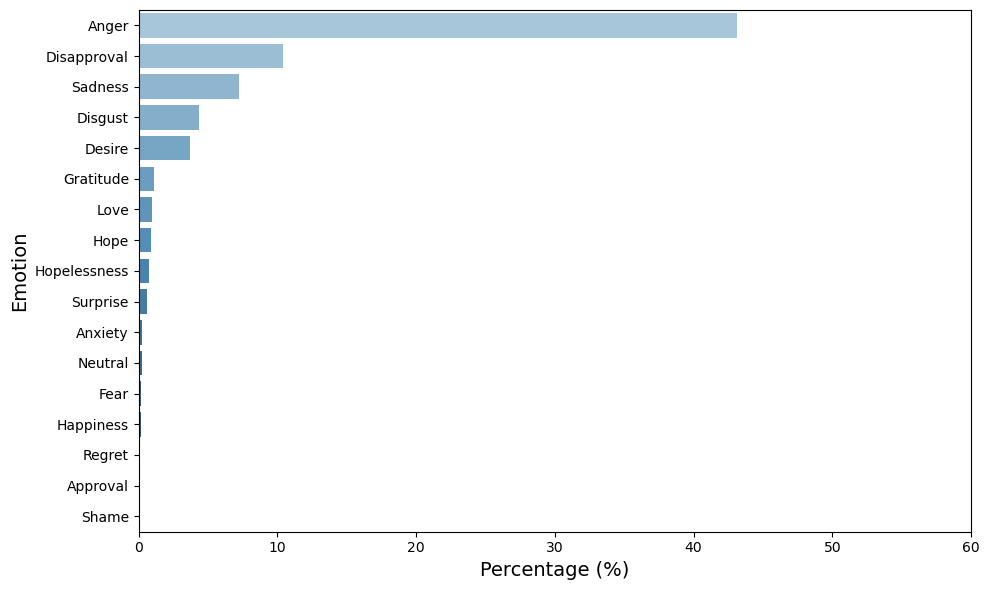

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explode and translate emotions for both positive and negative tweets
df_migration_updated['emotions'] = df_migration_updated['emotions'].apply(translate_emotions)

# Separate positive and negative tweets
positive_tweets = df_migration_updated[df_migration_updated['stance_immigration'] == 1.0]
negative_tweets = df_migration_updated[df_migration_updated['stance_immigration'] == 2.0]

# Count occurrences of each emotion for positive and negative tweets, including 'No Emotion'
positive_emotion_counts = positive_tweets['emotions'].explode().value_counts()
negative_emotion_counts = negative_tweets['emotions'].explode().value_counts()

# Calculate percentages based on the entire dataset, including 'No Emotion'
positive_emotion_percentages = (positive_emotion_counts / positive_emotion_counts.sum()) * 100
negative_emotion_percentages = (negative_emotion_counts / negative_emotion_counts.sum()) * 100

# Filter out 'No Emotion' for plotting but keep it in the percentage calculation
positive_emotion_percentages_filtered = positive_emotion_percentages.drop('No Emotion', errors='ignore')
negative_emotion_percentages_filtered = negative_emotion_percentages.drop('No Emotion', errors='ignore')

# Plot for Positive Tweets
plt.figure(figsize=(10, 6))
sns.barplot(x=positive_emotion_percentages_filtered.values, y=positive_emotion_percentages_filtered.index, palette='Blues_d')
plt.xlabel('Percentage (%)', fontsize=14)
plt.ylabel('Emotion', fontsize=14)
plt.xticks(ticks=range(0, 61, 10), labels=[f'{i}' for i in range(0, 61, 10)])
plt.tight_layout()
plt.show()




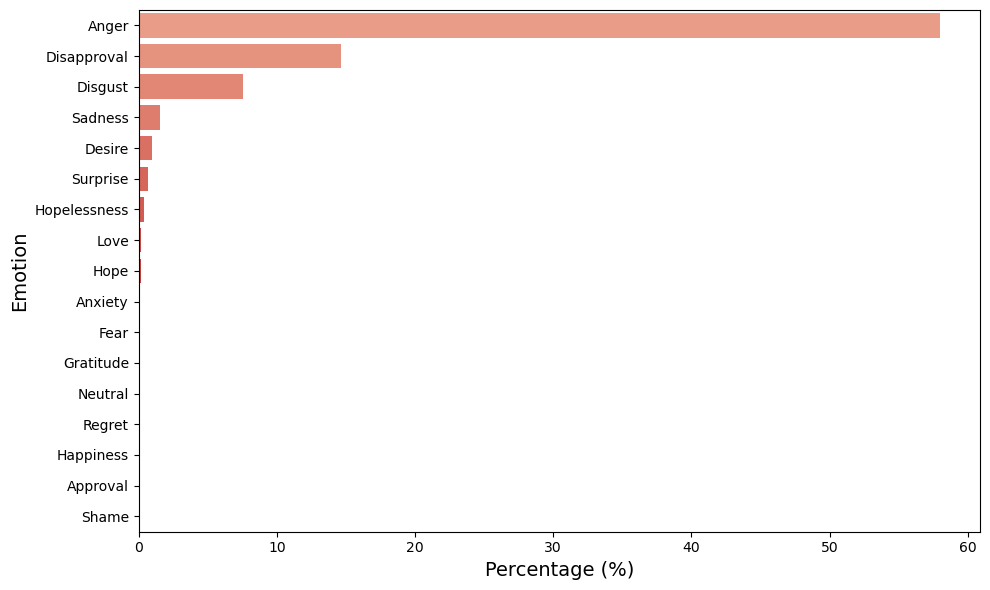

In [72]:
# Plot for Negative Tweets
plt.figure(figsize=(10, 6))
sns.barplot(x=negative_emotion_percentages_filtered.values, y=negative_emotion_percentages_filtered.index, palette='Reds_d')
plt.xlabel('Percentage (%)', fontsize=14)
plt.ylabel('Emotion', fontsize=14)
plt.xticks(ticks=range(0, 61, 10), labels=[f'{i}' for i in range(0, 61, 10)])

plt.tight_layout()
plt.show()

In [73]:
# Explode and translate emotions for the entire dataset
df_migration_updated['emotions'] = df_migration_updated['emotions'].apply(translate_emotions)

# Count occurrences of each emotion, including 'No Emotion'
total_emotion_counts = df_migration_updated['emotions'].explode().value_counts()

# Calculate percentages based on the entire dataset, including 'No Emotion'
total_emotion_percentages = (total_emotion_counts / total_emotion_counts.sum()) * 100

# Get the percentage of 'No Emotion'
no_emotion_percentage = total_emotion_percentages.get('No Emotion', 0)

# Print the percentage of 'No Emotion' in the entire dataset
print(f"Percentage of 'No Emotion' in the entire dataset: {no_emotion_percentage:.2f}%")


Percentage of 'No Emotion' in the entire dataset: 29.28%
